## RAT data

I'm plotting the data from the paper:

*Edward M. Bowden and Mark Jung-Beeman. Normative data for 144 compound remote associate prob-
lems. Behavior Research Methods, Instruments, & Computers: A Journal of the Psychonomic Society,
Inc, 35(4):634–639, 2003.*

The paper is attached. The authors used 144 problems and four different time limits (2 sec, 7 sec, 15 sec and 30 sec). For every time limit they report percentage of participants solving a problem, mean reaction times and standard deviations (apart from the 2 sec condition, it was too short to measure RT in this condition).

In [1]:
"""
Plot the data from the xls sheet storing problem accuracies,
response times and deviations. `array` format:

0             1               2               3
-------------------------------------------------------
2 sec %       7 sec %         7 sec avg_t     7 sec std

4             5               6               7
-------------------------------------------------------
15 sec %      15 sec avg_t    15 sec std      30 sec %

8             9
------------------------
30 sec avg_t  30 sec std
"""

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
font = {'family': 'serif',
        'serif': 'Times New Roman',
        'size': 24}
legend_fs = 20
matplotlib.rc('font', **font)

In [3]:
# load the xls data
path_file = '../144CompoundBowden.xlsx'
xls = pd.ExcelFile(path_file)
sheet_name = xls.sheet_names[0]

parse_cols = np.arange(2, 13)
data = xls.parse(sheet_name, skip_footer=2, parse_cols=parse_cols)
array = data.reset_index().values.T
array = array[1:]

In [4]:
n_prob = 144
colors = ['#EE0000', '#FFCC00', '#009900', '#0000FF']
pid = np.arange(n_prob)
lw = 2
labels = ['2 sec', '7 sec', '15 sec', '30 sec']
pats = ['-', '--', ':',  '-.']
col_to_plot = [0, 1, 4, 7]
figsize = (10, 8)

First I'm plotting the percentage of participants solving an item. The x-axis in the plot is going to be a problem ID number (same for all conditions), and on the y-axis the percentages. The green curve (15 sec) is smooth because the problem IDs were obtained after sorting success rates for the 15 sec condition. So they took all the results for the 15 sec condition, and picked the easiest problem (the highest solution rates) and assigned it ID 1, then the second easiest was ID 2 etc.

For 2 sec there were 89 participants, for 7 sec 85 participants, for 15 sec 76 participants and for 30 sec 39 participants. In 30 sec participants are wearing an EEG cap while their ERPs are measured, so that might have slightly altered the responses (additional distraction).

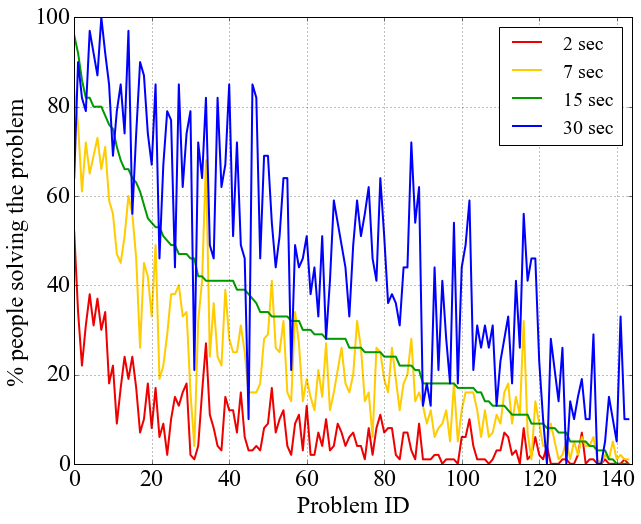

In [5]:
plt.figure(figsize=figsize)
# plot accuracy rates
for idx, n in enumerate(col_to_plot):
    plt.plot(pid, array[n], lw=lw, label=labels[idx], color=colors[idx])

plt.xlabel('Problem ID')
plt.ylabel('% people solving the problem')
plt.legend(loc='best', prop={'size': legend_fs})
plt.xlim(0, n_prob)
plt.grid(True)
if 0:
    plt.savefig('img/problem_accuracies.pdf')


Now, for every timing condition, we plot the average response time (computed over people who correctly solved the problem) and the standard deviation. As expected, it is very variable for the most difficult problems (those after 100 that are solved by only few people).

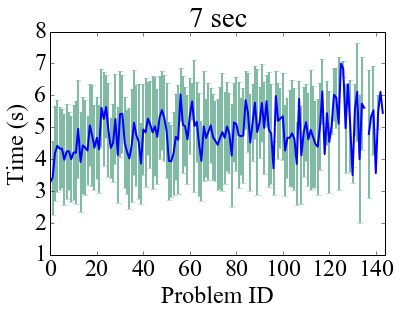

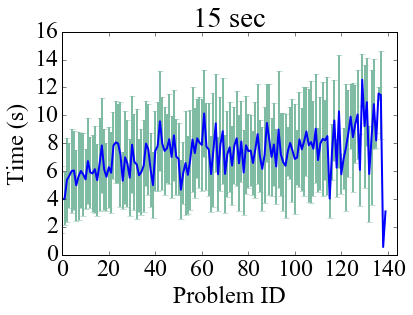

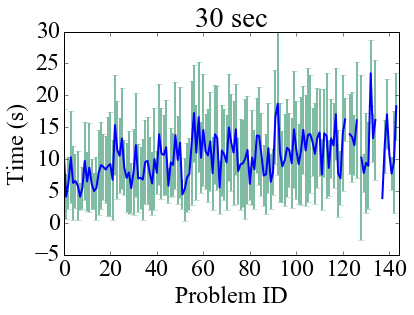

In [6]:
# plot reaction times
col_to_plot = [2, 5, 8]
for idx, n in enumerate(col_to_plot):
    plt.figure()
    plt.errorbar(pid, array[n], yerr=array[n+1], label=labels[idx+1],
                 ecolor="#80bca3", lw=lw)
    plt.xlim(0, n_prob)
    plt.title(labels[idx+1])
    plt.xlabel('Problem ID')
    plt.ylabel('Time (s)')
    if 0:
        plt.savefig('img/rt_' + labels[idx+1].replace(' ', '_') + '.pdf')

plt.show()